# Frequency Analysis and Low-Pass Filtering of a Randomized Harmonic Signal Using Fourier Methods

## 1. Introduction and Problem Setup

In this project, I aim to analyze the frequency components of a randomly generated signal using Fourier Transform methods. The signal consists of three base frequencies (50 Hz, 120 Hz, and 250 Hz) with added randomized harmonics, phase differences, and white noise to simulate a complex, realistic waveform. This type of analysis can help understand the underlying structure of complex signals by breaking them down into individual frequency components.

The analysis includes:

* Generating and visualizing the signal in both time and frequency domains.

* Creating a Fourier series approximation and conducting a frequency analysis.

* Developing and applying a low-pass filter to explore its effects on the signal.

## 2. Signal Generation

I start by generating a random signal with the following properties:

* Base Frequencies: 50 Hz, 120 Hz, and 250 Hz.

* Randomized Harmonics: Harmonics are added to each base frequency with slight amplitude variations and frequency offsets, introducing natural variability.

* White Noise: Gaussian noise is added to simulate real-world imperfections.

The resulting signal is a complex, unique waveform that serves as the basis for my analysis.

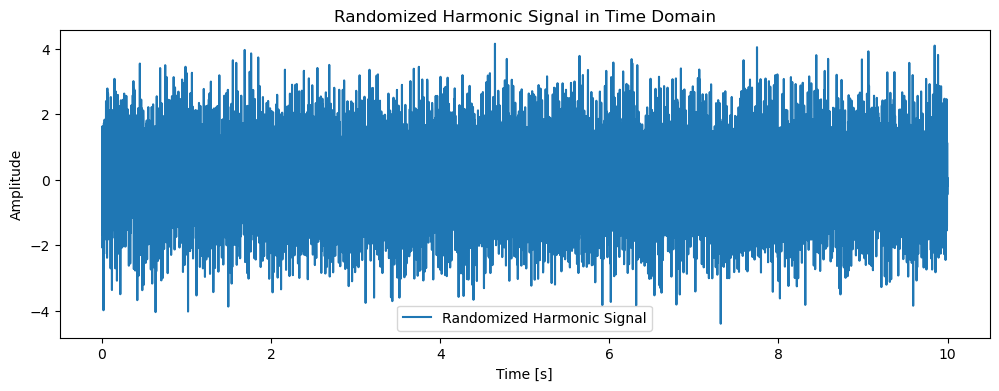

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the signal
sampling_rate = 1000  # Sampling rate in Hz
duration = 10  # Duration of the signal in seconds
T = duration  # Period of the signal
N = 5000  # Number of terms in the Fourier series

# Generate the time values at which the signal is sampled
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define the signal function v(t) for Fourier analysis
def v(t):
    """
    Generate a signal composed of multiple sinusoidal waves with random amplitudes, phases, and frequencies,
    along with some random noise.

    Parameters:`
    t (array-like): Time values at which the signal is evaluated.

    Returns:
    array-like: The generated signal.

    """
    np.random.seed(42)
    base_frequencies = [50, 120, 250] # Base frequencies in Hz
    signal = np.zeros_like(t)
    for f in base_frequencies:
        amplitude = np.random.uniform(0.5, 1.5)
        phase = np.random.uniform(0, 2 * np.pi)
        signal += amplitude * np.sin(2 * np.pi * f * t + phase)
        
        for n in range(2, 5):
            harmonic_amp = amplitude * np.random.uniform(0.1, 0.5)
            harmonic_freq = f * n + np.random.uniform(-5, 5)
            signal += harmonic_amp * np.sin(2 * np.pi * harmonic_freq * t + phase)
    
    noise_amplitude = 0.3
    signal += noise_amplitude * np.random.normal(size=t.shape)
    return signal

signal = v(t)

# Plot the signal in the time domain
plt.figure(figsize=(12, 4))
plt.plot(t, signal, label="Randomized Harmonic Signal")
plt.title("Randomized Harmonic Signal in Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### Audio Playback:
Using the `sounddevice` library, I can listen to the generated signal to understand its audible characteristics.

In [37]:
import sounddevice as sd

# Normalize the signal to avoid clipping
normalized_signal = signal / np.max(np.abs(signal))

# Play the signal
sd.play(normalized_signal, samplerate=sampling_rate)

# Wait until the sound is done playing
sd.wait()

## 3. Fourier Approximation of the Signal

Using custom Fourier functions from class implementations, I approximate the generated signal with a Fourier series. This process allows me to decompose the time-domain signal into individual frequency components, giving insight into the underlying frequency content.

I first define and calculate the Fourier coefficients for the signal. Then, I sum up the Fourier series terms to approximate the signal.

In [38]:
# Compute the Fourier coefficient
def compute_cn(v, n, T, f0):
    m = float(n)
    x = np.linspace(0, T, 10000) #define time range for integration
    f = v(x)*np.exp(-1j*m*2*np.pi*f0*x)
    cn = 0
    cn = np.trapz(f, x)/T
    return cn

# Fourier series expansion using complex form
def complex_fourier_series_expansion(v, t, T, N):
    f0 = 1 / T
    series = np.zeros_like(t, dtype=complex)

    for n in range(-N,N+1):
        Cn = compute_cn(v, n, T, f0)
        m = float(n)
        series += Cn*np.exp(1j*m*2*np.pi*f0*t) 
    return series.real

### Visualization

The original signal and Fourier approximation are plotted in the time domain, showing the accuracy of the approximation.

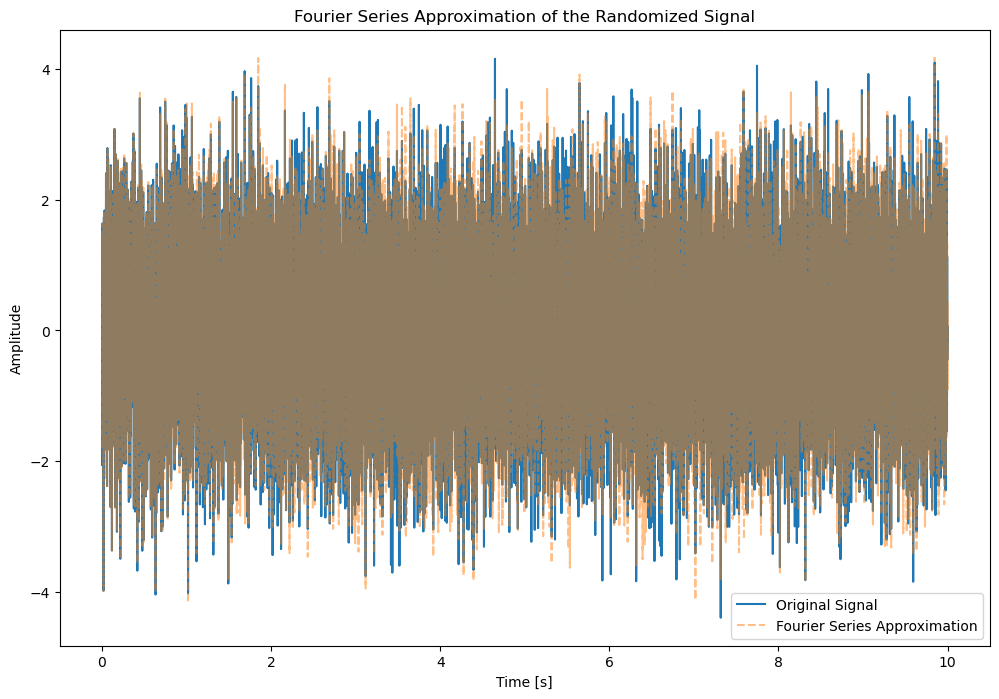

In [39]:
V_real = complex_fourier_series_expansion(v, t, T, N)
V = v(t)  # Original signal

# Plot the original signal and its Fourier approximation
plt.figure(figsize=(12, 8))
plt.plot(t, V, label='Original Signal')
plt.plot(t, V_real, label='Fourier Series Approximation', linestyle='--', alpha=0.5)
plt.title("Fourier Series Approximation of the Randomized Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
plt.show()

### Audio Playback

Again, we can use sound to judge the accuracy of this approximation.

In [40]:
# Play the Fourier series approximation
normalized_signal = V_real / np.max(np.abs(V_real))
sd.play(normalized_signal, samplerate=sampling_rate)
sd.wait()

## 4. Frequency Analysis of the Signal

To further investigate the frequency content, I conduct a frequency analysis by computing the Fourier coefficients for a range of frequencies. By plotting the magnitude of each frequency component, I can clearly identify the base frequencies and harmonic peaks.

### Visualization:

* *Stem Plot*: Displays the magnitudes of Fourier coefficients across frequencies, indicating the dominant frequencies in the signal.

* *Spectrogram*: A time-frequency representation showing how the frequency content varies over time.

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_11858/1832864927.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, magnitudes, use_line_collection=True)


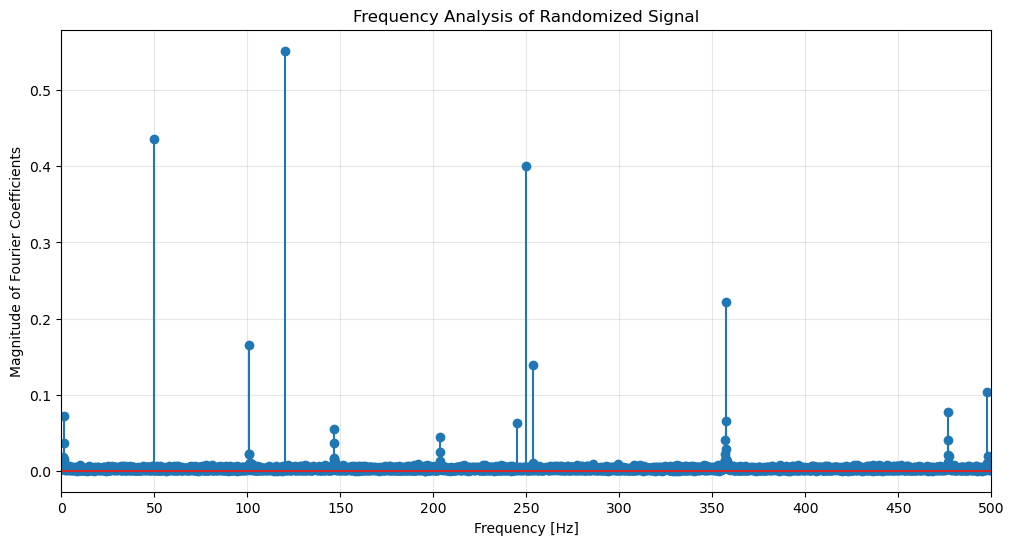

In [41]:
# Compute and store Fourier coefficients for frequency analysis
def frequency_analysis(v, T, N):
    f0 = 1 / T
    frequencies = []
    magnitudes = []
    
    # Sum over Fourier series terms and store magnitudes
    for n in range(-N, N + 1):
        Cn = compute_cn(v, n, T, f0)
        frequencies.append(n * f0)
        magnitudes.append(np.abs(Cn))
    
    return frequencies, magnitudes

frequencies, magnitudes = frequency_analysis(v, T, N)

# Plot frequency vs. magnitude
plt.figure(figsize=(12, 6))
plt.stem(frequencies, magnitudes, use_line_collection=True)
plt.title("Frequency Analysis of Randomized Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude of Fourier Coefficients")
plt.xlim(0, 500)
plt.xticks(np.arange(0, 501, 50))
plt.grid(alpha=0.3)
plt.show()

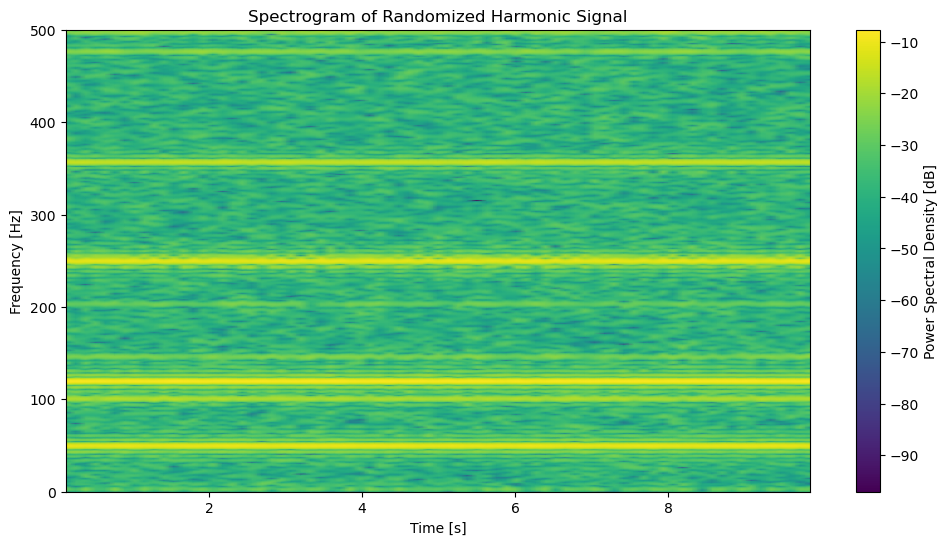

In [42]:
# Create a spectrogram
from scipy.signal import spectrogram

f, t_1, Sxx = spectrogram(signal, fs=sampling_rate, nperseg=256, noverlap=128, nfft=1024)
plt.figure(figsize=(12, 6))
plt.pcolormesh(t_1, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Spectrogram of Randomized Harmonic Signal")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Power Spectral Density [dB]")
plt.ylim(0, 500)
plt.show()

## Extra Credit: Low-Pass Filter

To explore signal filtering, I design a low-pass filter that suppresses high frequencies above 200 Hz. By applying this filter to the Fourier coefficients, I retain only the low-frequency components in the signal.

* **Filter Design**: A custom low-pass filter function zeroes out Fourier coefficients for frequencies above 200 Hz.

* **Filtered Signal Reconstruction**: Using the filtered Fourier coefficients, I reconstruct the signal in the time domain.

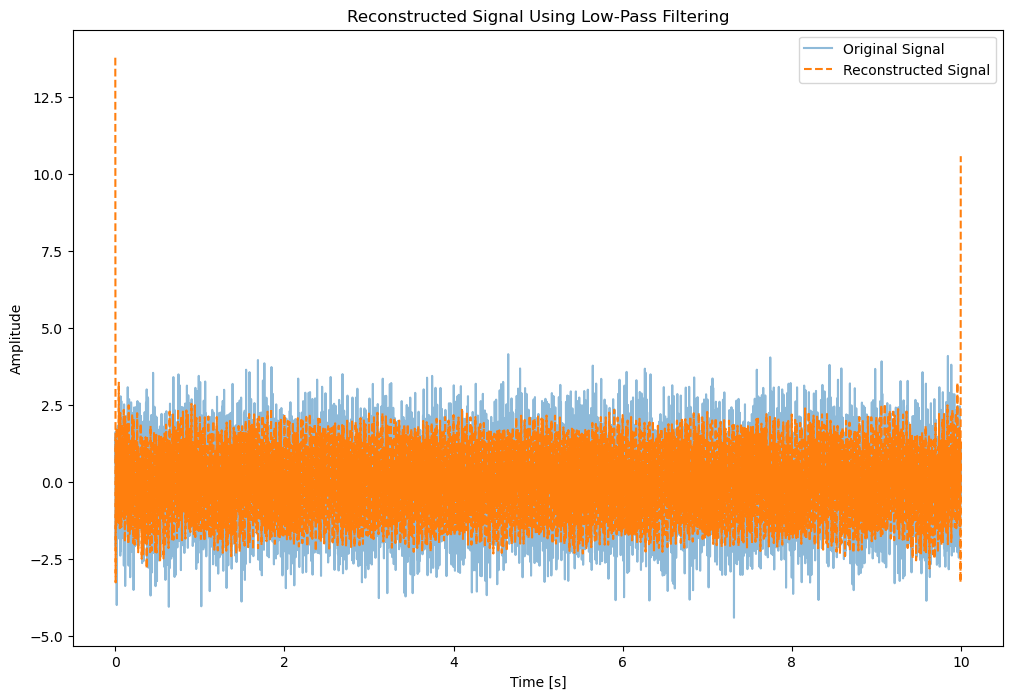

In [43]:
# Create a low-pass filter
def low_pass_filter(frequencies, magnitudes, cutoff_frequency):
    # Create a filtered list of magnitudes where high frequencies are set to 0
    filtered_magnitudes = np.array(magnitudes)
    for i, f in enumerate(frequencies):
        if abs(f) > cutoff_frequency:
            filtered_magnitudes[i] = 0
    return filtered_magnitudes

# Reconstruct the signal using the filtered Fourier coefficients
def reconstruct_signal(v, frequencies, filtered_magnitudes, T, N):
    f0 = 1 / T
    reconstructed_signal = np.zeros_like(v(t), dtype=complex)
    for i, n in enumerate(range(-N, N + 1)):
        Cn = filtered_magnitudes[i] * np.exp(1j * n * 2 * np.pi * f0 * t)
        reconstructed_signal += Cn
    return np.real(reconstructed_signal)

# Perform low-pass filtering with a cutoff frequency of 200 Hz
cutoff_frequency = 200
filtered_magnitudes = low_pass_filter(frequencies, magnitudes, cutoff_frequency)

# Reconstruct the signal using the filtered Fourier coefficients
reconstructed_signal = reconstruct_signal(v, frequencies, filtered_magnitudes, T, N)

# Plot the original signal and the reconstructed signal
plt.figure(figsize=(12, 8))
plt.plot(t, V, label='Original Signal', alpha=0.5)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title("Reconstructed Signal Using Low-Pass Filtering")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### Visualization:

**Filtered Signal in Frequency Domain**: A stem plot and spectrogram display the filtered frequency components, showing only the frequencies below the 200 Hz cutoff.

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_11858/3364576389.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies_reconstructed, magnitudes_reconstructed, use_line_collection=True)


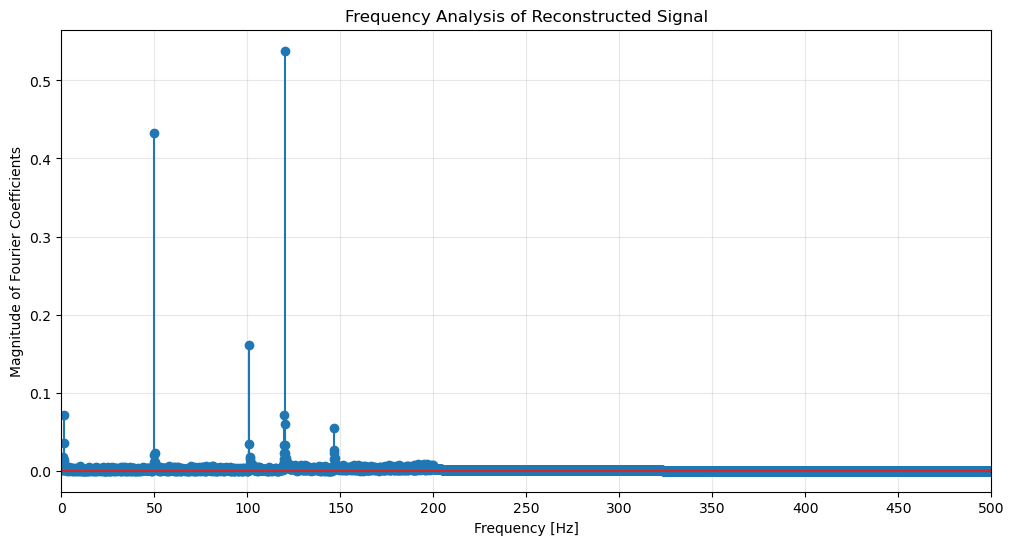

In [44]:
# Frequency analysis of the reconstructed signal
frequencies_reconstructed, magnitudes_reconstructed = frequency_analysis(lambda x: reconstructed_signal, T, N)

# Plot frequency vs. magnitude for the reconstructed signal
plt.figure(figsize=(12, 6))
plt.stem(frequencies_reconstructed, magnitudes_reconstructed, use_line_collection=True)
plt.title("Frequency Analysis of Reconstructed Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude of Fourier Coefficients")
plt.xlim(0, 500)
plt.xticks(np.arange(0, 501, 50))
plt.grid(alpha=0.3)
plt.show()

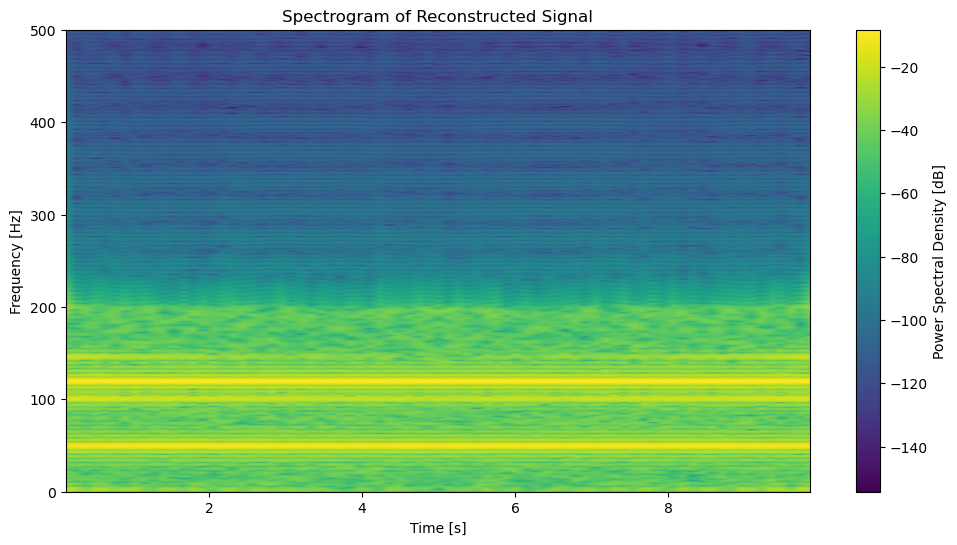

In [45]:
# Plot the spectrogram of the reconstructed signal
f, t_1, Sxx = spectrogram(reconstructed_signal, fs=sampling_rate, nperseg=256, noverlap=128, nfft=1024)
plt.figure(figsize=(12, 6))
plt.pcolormesh(t_1, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Spectrogram of Reconstructed Signal")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Power Spectral Density [dB]")
plt.ylim(0, 500)
plt.show()

### Audio Playback

**Filtered Signal in Time Domain**: We play the filtered signal to hear how the removal of high frequencies affects its sound.

In [47]:
# Play the reconstructed signal
normalized_signal = reconstructed_signal / np.max(np.abs(reconstructed_signal))
sd.play(normalized_signal, samplerate=sampling_rate)
sd.wait()